In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time

In [8]:
testing = pd.read_csv('./data/house-prices-advanced-regression-techniques/test.csv')
training = pd.read_csv('./data/house-prices-advanced-regression-techniques/train.csv')

# Exploration


In [9]:
print(f"training dataset {training.shape}, \n testing dataset {testing.shape}")

training dataset (1460, 81), 
 testing dataset (1459, 80)


In [10]:
def test_equality(training, testing):
    # Return how many features have equivalent names in both training and testing sets
    equality = []
    for index, column in enumerate(testing.columns):
        if column == training.columns[index]:
            equality.append(True)
        else:
            equality.append(False)
    return sum(equality)

In [11]:
test_equality(training, testing)

80

Now we know all the features match. The test set has one less column than the train set because that missing one is the target variable.

Our job is to figure out how to transform both datasets uniformly so that they retain this correspondence. This is easier said than done

## Variable Distributions


array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>],
       [<AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>],
       [<AxesSubplot:title={'center':'BsmtHalfBath'

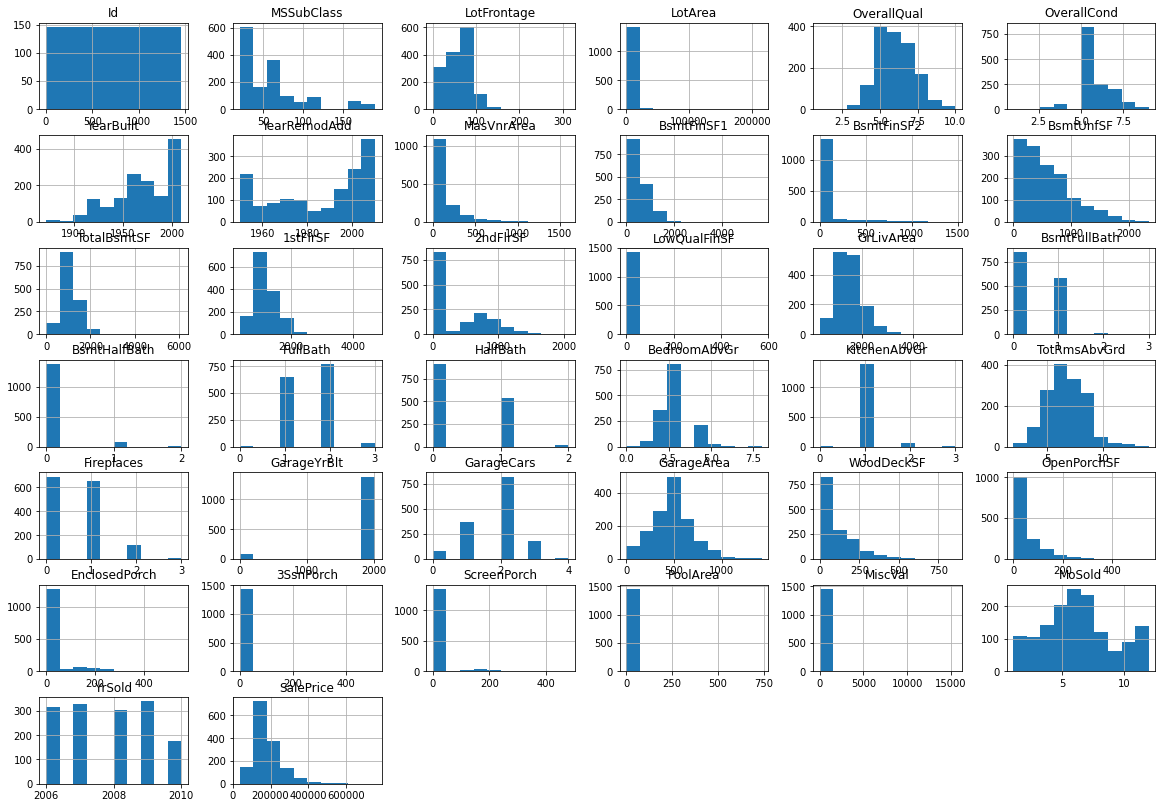

In [78]:
training.hist(figsize=(20, 14))

## Removing Missing Values

In [12]:
training.fillna(value=0, inplace=True)
testing.fillna(value=0, inplace=True)

## Removing Categorical Variables


In [13]:
# All categorical variables
cat_vars = list(training.describe(include=['object']).columns)
training.drop(columns=cat_vars, inplace=True)
testing.drop(columns=cat_vars, inplace=True)

## Target and Predictor Split


In [14]:
# Target
Y = training[['SalePrice']]
# Predictors
X = training.drop(columns='SalePrice')

## Train Test Split


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=1)

# Regression Trees


In [16]:
regr_tree = DecisionTreeRegressor(criterion="squared_error", max_depth=5)

In [26]:
start = 1
no_features = 7
regr_tree.fit(X_train, Y_train)

regr_tree.score(X_train, Y_train)

0.8471573228279401

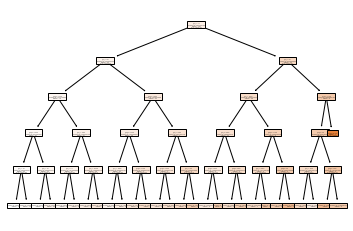

In [27]:
tree.plot_tree(regr_tree, filled=True)
plt.savefig('./data/tree.pdf',format='pdf')

## Evaluation metrics


In [36]:
# Checking whether features match
print("Equivalent Features: ", test_equality(X_train, X_test))
print("X_train Feature Count: ", X_train.shape[1], "X_test Feature Count: ", X_test.shape[1])

Equivalent Features:  37
X_train Feature Count:  37 X_test Feature Count:  37


In [39]:
regr_tree.score(X_test, Y_test)

0.845999317371643

## Conclusions


We may have a winning model. This model has both good in-sample and out-of-sample accuracy **85%**. This model has proven easier to construct and more consistently accurate than the purely linear models I have tried before.

# Regression Trees with Cross Validation


On submitting the predictions to Kaggle, our model did really bad. It only had a 0.2 accuracy score which is just baffling to me. So perhaps we need to make more complete use of our data. We will try with cross validation on our existing continuous variables first.

## Saving Predictions


We will now make predictions on the test set that came with the competition itself.

In [58]:
yhat = regr_tree.predict(testing)

In [72]:
yhat_df = pd.DataFrame({'Id' : range(1461, 2920), 'SalePrice' : yhat})

In [74]:
yhat_df.to_csv('I:/My Drive/Colab Notebooks/All/data/house-prices-advanced-regression-techniques/houseprices_prediction.csv', index=False)